Import library

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import fnmatch
from sklearn.feature_selection import RFE


In [26]:
loan = pd.read_csv(r"C:/Users/Administrator/Desktop/Companion learning/loan_data.csv")

In [27]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [28]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


check null value

In [29]:
loan.isna()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9574,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9575,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9576,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
loan.dropna()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


## visualize data

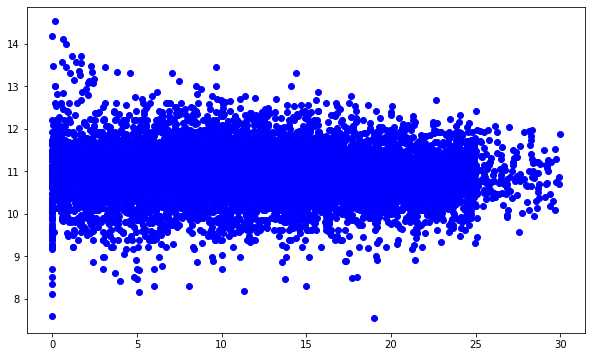

In [31]:
## scatter plot to find trend between debt to income ratio and log-annual _income rate
## using matplotlib
plt.figure(figsize=(10,6))
plt.scatter(loan['dti'], loan['log.annual.inc'], c ="blue") 
  
# To show the plot 
plt.show()

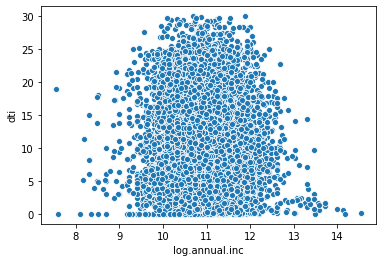

In [32]:
## using seaborn
sns.scatterplot(data=loan, x="log.annual.inc", y="dti")

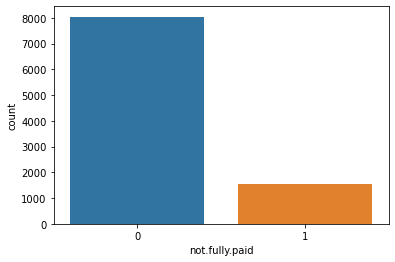

In [33]:
## response variable - not fuly paid vs fico rate
sns.countplot(data = loan, x = loan['not.fully.paid'])

Text(0.5, 0, 'FICO')

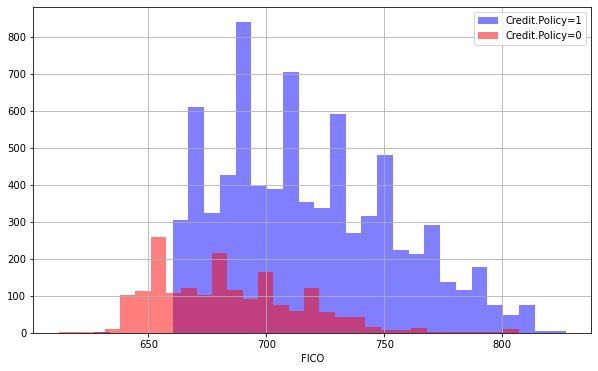

In [34]:
## plot of histogtramm
# using matplotlib
plt.figure(figsize=(10,6))

loan[loan['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')

loan[loan['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()

plt.xlabel('FICO')

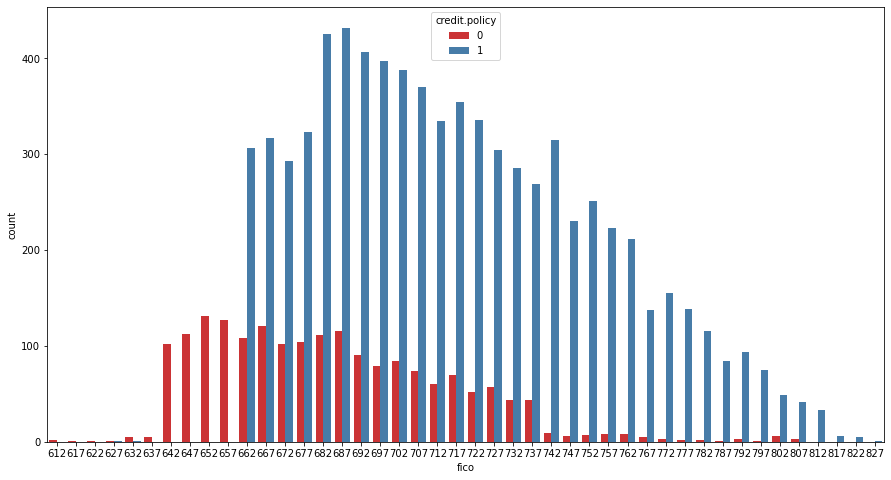

In [35]:
## plot of histogtramm
# using seaborn
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(loan['fico'], data = loan ,hue="credit.policy",palette='Set1' , linewidth=10, ax=ax)

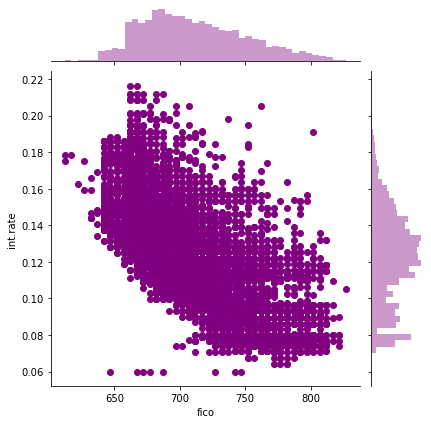

In [36]:
##trend between FICO score and interest rate.
sns.jointplot(x='fico',y='int.rate',data=loan,color='purple')

## convert purpose categorical column into cont. column ( one hote encoding)
Categorical Features
Notice that the purpose column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.


In [37]:
purpose_str =   ['purpose']

Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables.

Set this dataframe as final_data.

In [38]:
Loan_model = pd.get_dummies(loan,columns = purpose_str,drop_first=True)

In [39]:
Loan_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

Train Test Split
Now its time to split our data into a training set and a testing set!

Use sklearn to split your data into a training set and a testing set as we've done in the past.

In [40]:
X = Loan_model.drop('not.fully.paid',axis=1)
y = Loan_model['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

Import DecisionTreeClassifier

Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [41]:
dtree = DecisionTreeClassifier()

In [42]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Predictions and Evaluation of Decision Tree

Create predictions from the test set and create a classification report and a confusion matrix.

In [43]:
predictions = dtree.predict(X_test)

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [45]:
print(confusion_matrix(y_test,predictions))

[[1987  444]
 [ 339  104]]


In [46]:
print(accuracy_score(y_test,predictions))

0.7275574112734864


## Training the Random Forest model

Now its time to train our model!

Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier(n_estimators=800)

In [49]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=800)

Predictions and Evaluation

**Let's predict off the y_test values and evaluate our model.

**Predict the class of not.fully.paid for the X_test data.



In [50]:
predictions = rfc.predict(X_test)

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [52]:
print(confusion_matrix(y_test,predictions))

[[2423    8]
 [ 434    9]]


In [53]:
print(accuracy_score(y_test,predictions))

0.8462073764787752


# Implementing k - Nearest Neighbour Algorithm:

In [54]:
X = Loan_model.drop('not.fully.paid',axis=1)
y = Loan_model['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [55]:
## k - Nearest Neighbour Model:
knn = KNeighborsClassifier(n_neighbors=5)

In [56]:
## Train the model using training data set
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:
## Prediction on test data set
y_pred = knn.predict(X_test)

In [58]:
## Model Accuracy and F1-Score
cfm = metrics.confusion_matrix(y_test,y_pred)
acc = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
report = metrics.classification_report(y_test,y_pred)
print("Confusion  Matrix", cfm)
print("Accuracy:",acc*100)
print("Error:", (1 - acc)*100)
print("F1 Score:",f1_score)
print("Classfication Report:",report)

Confusion  Matrix [[2335   96]
 [ 417   26]]
Accuracy: 82.15031315240083
Error: 17.849686847599166
F1 Score: 0.0920353982300885
Classfication Report:               precision    recall  f1-score   support

           0       0.85      0.96      0.90      2431
           1       0.21      0.06      0.09       443

    accuracy                           0.82      2874
   macro avg       0.53      0.51      0.50      2874
weighted avg       0.75      0.82      0.78      2874



# Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [60]:
dtree = DecisionTreeClassifier()
rfe = RFE(dtree, 5) # selecting best 5 features
rfe = rfe.fit(X_train,y_train)
#print(rfe.support_)
#print(rfe.ranking_)
L=list(loan.columns)
rank=list(rfe.ranking_)
feature=[]
for i in range(len(rfe.support_)):
    if rank[i]==1:
        feature.append(L[i])
print(feature)


# This algorithm can be further developed and number of best features can be optimised by taking into consideration
## any performance metric like AIC, Accuracy, ROC AUC score, etc similar to step wise refression done in R 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


['int.rate', 'log.annual.inc', 'fico', 'days.with.cr.line', 'revol.bal']


In [67]:
 #Data for train and test considering best 5 features
    ## create new data frame for trainig and testing data set
x_train_new=pd.DataFrame()
for i in feature:
    x_train_new[i]=X_train[i]
x_test_new=pd.DataFrame()
for i in feature:
    x_test_new[i]=X_test[i]

In [68]:
x_train_new.head()

,int.rate,log.annual.inc,fico,days.with.cr.line,revol.bal
4845,0.1426,10.714418,682,3959.958333,9092
6910,0.0774,10.819778,772,5190.041667,2232
8146,0.1520,10.491274,642,3270.000000,6970
7113,0.1385,10.950807,682,3420.041667,21113
195,0.1059,11.034890,682,6330.041667,18168


In [69]:
x_test_new.head()

,int.rate,log.annual.inc,fico,days.with.cr.line,revol.bal
5244,0.1287,10.933107,687,5100.000000,11508
1739,0.1347,11.695247,712,6420.041667,81833
2780,0.0768,10.545341,802,4560.000000,3199
7062,0.1099,10.858999,702,4940.041667,9222
6661,0.1913,11.736069,687,4561.041667,12730


# Desion Tree : For new Train Data considering significant 5 features

In [71]:
dtree_new = DecisionTreeClassifier()

In [72]:
dtree_new.fit(x_train_new,y_train)

DecisionTreeClassifier()

In [74]:
predictions_new = dtree_new.predict(x_test_new)

In [75]:
print(classification_report(y_test,predictions_new))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      2431
           1       0.15      0.20      0.17       443

    accuracy                           0.71      2874
   macro avg       0.50      0.50      0.50      2874
weighted avg       0.74      0.71      0.72      2874



In [76]:
print(accuracy_score(y_test,predictions_new))

0.710160055671538
